In [1]:
import  cv2
import  matplotlib.pyplot as plt
from darkflow.net.build  import  TFNet

%config InlineBackend.figure_format = 'svg'

In [2]:
# loading darkflow module
options ={
    
    'model' : 'cfg/yolo.cfg',
    'load'   : 'bin/yolo.weights',
    'threshold' : 0.3,
    'gpu' : 1.0
    
}


In [3]:
# running data modules in 
checktf=TFNet(options)

Parsing ./cfg/yolo.cfg
Parsing cfg/yolo.cfg
Loading bin/yolo.weights ...
Successfully identified 203934260 bytes
Finished in 0.05754542350769043s
Model has a coco model name, loading coco labels.

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 608, 608, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 608, 608, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 304, 304, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 304, 304, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 152, 152, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 152, 152, 128)
 Load  |  Yep!  | conv 1x1p0_1  +bnorm  leaky      | (?, 152, 152, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 152, 152, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 76, 76, 128)
 Load  |  Yep!

In [19]:
# loading images 
x=cv2.imread('/home/code/Pictures/dog.jpg',1)
imgout=checktf.return_predict(x)
imgout


[{'bottomright': {'x': 555, 'y': 467},
  'confidence': 0.84797806,
  'label': 'bicycle',
  'topleft': {'x': 80, 'y': 113}},
 {'bottomright': {'x': 694, 'y': 167},
  'confidence': 0.8014206,
  'label': 'truck',
  'topleft': {'x': 462, 'y': 81}},
 {'bottomright': {'x': 322, 'y': 539},
  'confidence': 0.770815,
  'label': 'dog',
  'topleft': {'x': 136, 'y': 214}}]

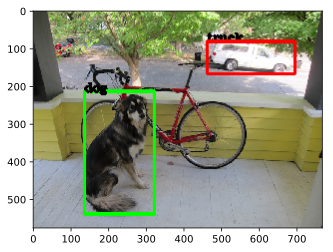

In [26]:
# choosing top left for dog
tl_dog=(imgout[2]['topleft']['x'],imgout[2]['topleft']['y'])
# choosing bottomrigh for dog
br_dog=(imgout[2]['bottomright']['x'],imgout[2]['bottomright']['y'])
# choosing label for dog
lb_dog=imgout[2]['label']

# choosing top left for truck
tl_truck=(imgout[1]['topleft']['x'],imgout[1]['topleft']['y'])
# choosing bottomrigh for dog
br_truck=(imgout[1]['bottomright']['x'],imgout[1]['bottomright']['y'])
# choosing label for dog
lb_truck=imgout[1]['label']

# drawing a rectangle 
img=cv2.rectangle(x,tl_dog,br_dog,(0,255,0),7)

img=cv2.putText(x,lb_dog,tl_dog,cv2.FONT_HERSHEY_COMPLEX,1,(0,0,0),5)
img=cv2.putText(x,lb_truck,tl_truck,cv2.FONT_HERSHEY_COMPLEX,1,(0,0,0),6)
img=cv2.rectangle(x,tl_truck,br_truck,(0,0,255),8)
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()